In [6]:
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF

In [119]:
with open('../data/pixel_vectors_all.pkl', 'rb') as f:
    pixel_vectors = pickle.load(f)
    
pixel_vectors = np.array(pixel_vectors) / 3000.0

In [120]:
with open('../data/pixel_vectors_labels_all.pkl', 'rb') as f:
    labels = pickle.load(f)

In [204]:
model = NMF(n_components=2, init='random', random_state=42, max_iter=300)
nmf_model = model.fit(pixel_vectors)
W = nmf_model.transform(pixel_vectors)
H = model.components_

In [205]:
W_negative = W[labels == 0]
W_positive = W[labels == 1]
p_negative = pixel_vectors[labels == 0]
p_positive = pixel_vectors[labels == 1]

In [206]:
print(np.mean(W_negative[:,0]))
print(np.mean(W_positive[:,0]))

print(np.mean(W_negative[:,1]))
print(np.mean(W_positive[:,1]))

0.7715448651450992
0.8058402786582582
0.38046941003761725
0.474764639584857


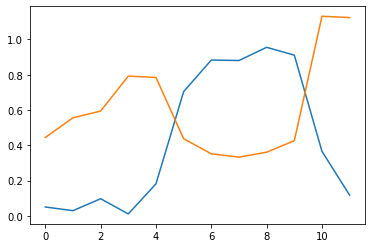

In [207]:
for a in H:
    plt.plot(a)
plt.show()

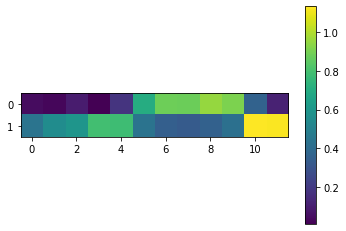

In [208]:
plt.imshow(H)
plt.colorbar()
plt.show()

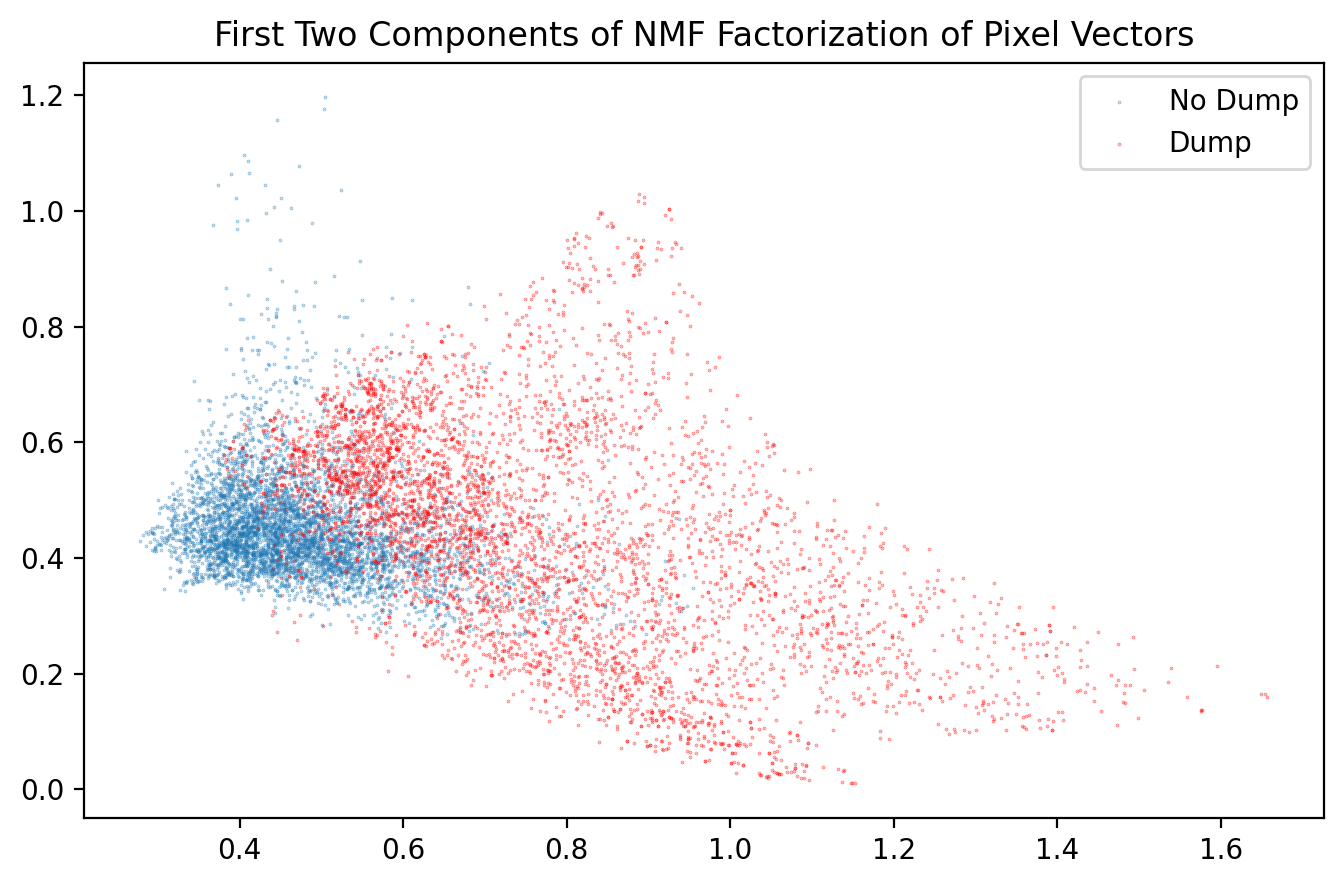

In [209]:
num_samples = 5000
plt.figure(figsize=(8,5), dpi=200)
plt.scatter(W_negative[:num_samples,0], W_negative[:num_samples,1], s=0.1, alpha=0.5, label='No Dump')
plt.scatter(W_positive[:num_samples,0], W_positive[:num_samples,1], c='r', s=0.1, alpha=0.5, label='Dump')
plt.legend()
plt.title('First Two Components of NMF Factorization of Pixel Vectors')
plt.show()

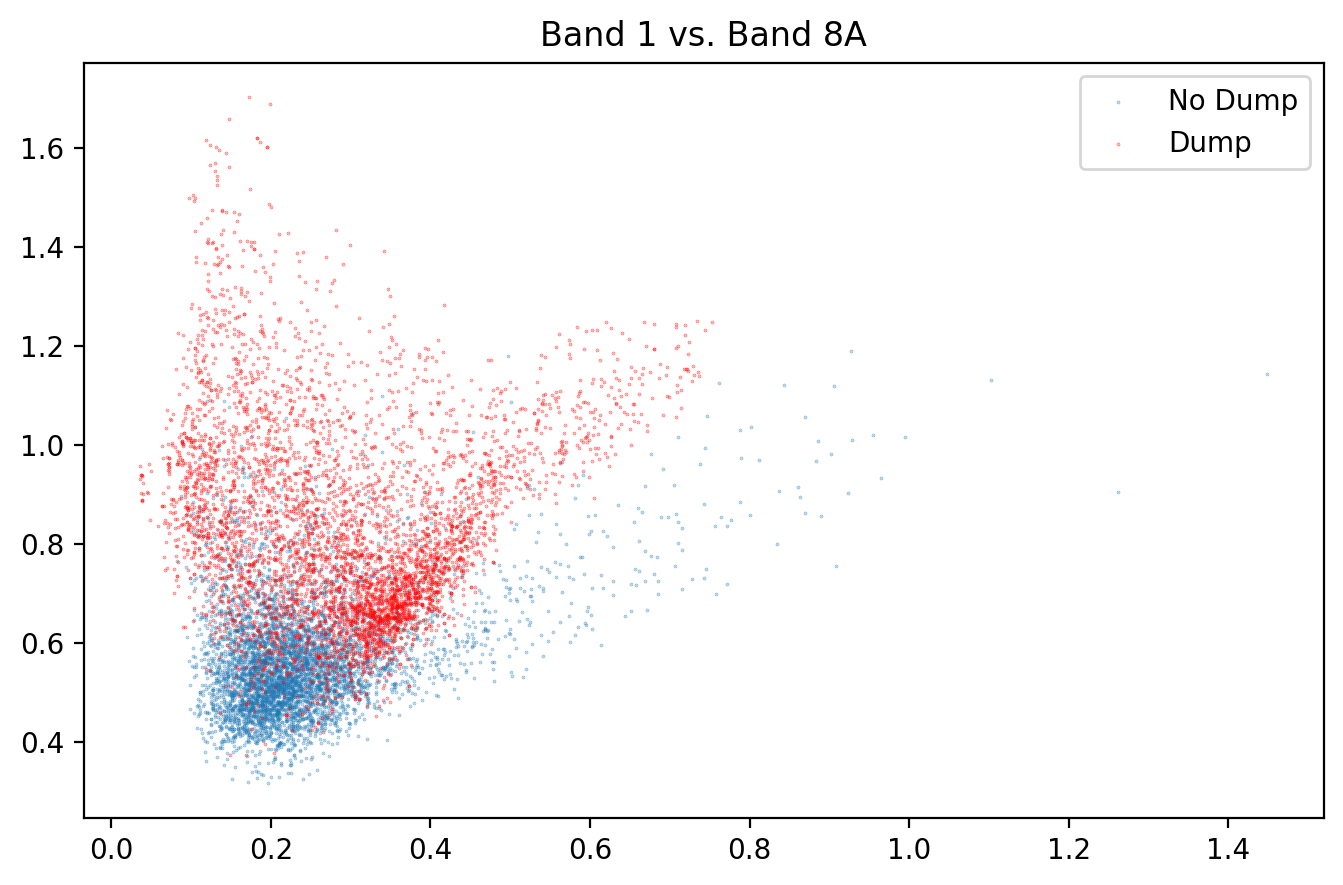

In [180]:
num_samples = 5000
plt.figure(figsize=(8,5), dpi=200)
plt.scatter(p_negative[:num_samples,1], p_negative[:num_samples,7], s=0.1, alpha=0.5, label='No Dump')
plt.scatter(p_positive[:num_samples,1], p_positive[:num_samples,7], c='r', s=0.1, alpha=0.5, label='Dump')
plt.legend()
plt.title('Band 1 vs. Band 8A')
plt.show()

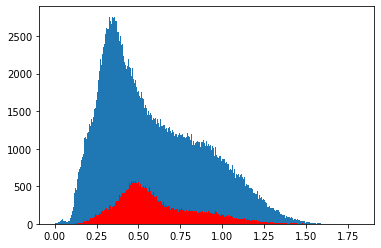

In [182]:
n, bins, patches = plt.hist(W_negative[:,1], bins=500);
plt.hist(W_positive[:,1], bins=bins, color='red');
plt.show()